# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [3]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)

## Low-Rank vs Diffuse Coefficient Changes

In [4]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [5]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

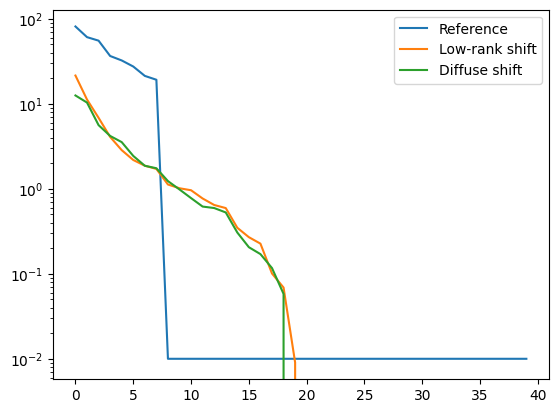

In [6]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(S_lr)
eig_dense = eigvalsh(S_dense)

plt.semilogy(eig0[::-1], label='Reference')
plt.semilogy(eig_lr[::-1], label='Low-rank shift')
plt.semilogy(eig_dense[::-1], label='Diffuse shift')
plt.legend()
plt.show()

**1. Count how many eigenvalues change significantly in the low-rank case.
2. Count how many eigenvalues change significantly in the diffuse case.**

In [16]:
ct_lr_sig_w = np.sum(np.abs((eig_lr - eig0) / eig0) > 0.1) # Calculates the difference between eigenvalue in low-rank and sigma0, finds the percentage difference, compares it to 10%, and then sums it to find the count.
print(f"1. Number of eigenvalues with > 10% relative difference (Low-rank case): {ct_lr_sig_w}")
ct_diff_sig_w = np.sum(np.abs((eig_dense - eig0) / eig0) > 0.1) # Calculates the difference between eigenvalue in diffuse and sigma0, finds the percentage difference, compares it to 10%, and then sums it to find the count.
print(f"2. Number of eigenvalues with > 10% relative difference (Diffuse case): {ct_diff_sig_w}")

1. Number of eigenvalues with > 10% relative difference (Low-rank case): 39
2. Number of eigenvalues with > 10% relative difference (Diffuse case): 40


1. In the low-rank case, how many eigenvalues change substantially, and how does this number relate to the rank of the coefficient modification?

Answer: In the low-rank case, 39 eigenvalues changed substantially by more than 10%. It relates because there is a direct proportion to the rank. The rank_star value is 2 so there is a change in two main geometric variance directions. The 39 eigenvalue chance means that there is a difference between theoretical models and estimations. Because of variability and noise in estimations, perturbation can make changes.

2. In the diffuse case, why are many eigenvalues affected, even though the overall magnitude of the change is the same?

Answer: In the diffuse case, 40 eigenvalues changed substantially by more than 10%. This means that almost all of the eigenvalues were affected. The diffuse nature has an impact across many dimensions because it distributes across the entire range of eigenvalues. Therefore, this results in a large count even with similar magnitude.

3. How do these observations illustrate the idea that matrix rank limits the number of variance directions that can change?

Answer: Low rank changes affect a smaller number of variance directions. Diffuse rank changes have a larger impact across a bigger range of eigenvalues. Low-rank perturbation limits the number of variance directions that can change but diffuse perturbations cause more widespread changes.